In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import RFECV

In [6]:
all = pd.read_csv('all_all.csv')

In [7]:
all

,Unnamed: 0,MEMBERSHIP_ID,CATEGORY_NBR,sales,cost,GMM_NBR,DMM_NBR,MEMBERSHIP_TYPE_CODE,MILES_TO_CLUB,hhh_age_desc,...,income_lower,income_upper,hh_size_desc,nbr_children_desc,ethnic_desc,JOIN_DATE,RENEW_IND,PLUS_MEMBERSHIP_IND,autorenew_ind,payroll_deduct_ind
0,1,1,1,155.28,176.9400,45.0,9.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
1,2,1,2,29.88,26.4400,12.0,277.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
2,3,1,7,109.96,85.8500,15.0,26.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
3,4,1,13,20.51,19.6100,12.0,20.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
4,5,1,14,105.80,100.9200,15.0,27.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
5,6,1,17,99.98,80.0300,15.0,27.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
6,7,1,21,51.87,42.1700,15.0,27.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
7,8,1,22,16.98,12.9900,15.0,24.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
8,9,1,23,139.80,98.7600,15.0,24.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0
9,10,1,37,7.98,6.2300,10.0,263.0,3,4.23,70.0,...,150.0,NaN,2.0,0.0,14.0,2017-01-14,2,0,0,0


In [8]:
columns=['CATEGORY_NBR','sales','cost','MEMBERSHIP_TYPE_CODE','hhh_age_desc','marital_status_desc','income_lower','income_upper','hh_size_desc','nbr_children_desc','ethnic_desc','PLUS_MEMBERSHIP_IND','autorenew_ind','payroll_deduct_ind']

In [9]:
all[columns]=all[columns].fillna(all[columns].mean())
all[columns]=minmax_scale(all[columns])
lr= LogisticRegression()
lr.fit(all[columns],all['RENEW_IND'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
coefficients = lr.coef_
coefficients

array([[  1.00049493e-01,  -7.07926039e-02,  -6.32631633e-02,
         -1.76957176e-01,  -6.51629886e-01,  -1.89223474e-01,
         -7.59325661e-02,  -1.56693669e-01,  -1.41102971e-01,
          2.55968064e-01,  -8.07358998e-02,  -1.90850243e-01,
         -4.73159397e+00,  -4.28941404e+00],
       [ -6.74754084e-02,   1.17952444e-03,   4.88691204e-04,
          1.84588144e-01,   5.48635000e-01,   1.00544278e-01,
         -9.03332100e-02,   1.26535234e-01,   1.10807014e-01,
         -1.98003362e-01,   4.02486514e-02,  -3.05342707e+00,
          1.66322072e+00,   1.29517473e+00],
       [ -8.01701551e-02,   1.46289246e-02,   1.41568986e-02,
          1.53346544e-01,   3.02446471e-01,   2.49891900e-01,
          2.75123610e-01,   1.18692768e-01,   7.53957727e-02,
         -1.62244971e-01,   8.83375836e-02,   5.02901848e+00,
          1.55220439e+00,   1.90086755e+00]])

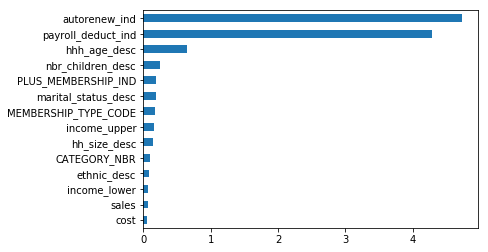

In [11]:
feature_importance = pd.Series(coefficients[0],index = all[columns].columns)

ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

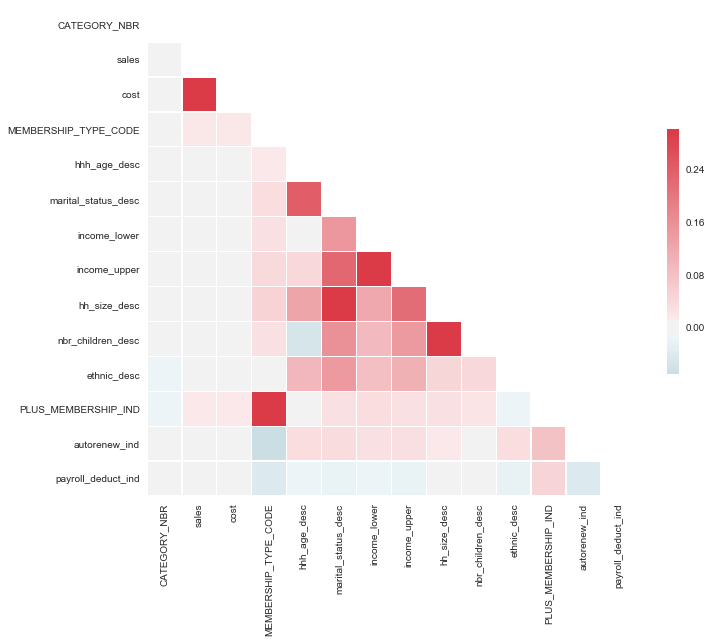

In [12]:
import seaborn as sns
import numpy as np
def plot_heatmap(df):
    corr = df.corr()
    sns.set(style = 'white')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_heatmap(all[columns])

In [13]:
lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all[columns],all['RENEW_IND'])

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [14]:
optimized_columns= pd.DataFrame(columns,selector.support_)
optimized_columns

,0
False,CATEGORY_NBR
False,sales
False,cost
True,MEMBERSHIP_TYPE_CODE
True,hhh_age_desc
True,marital_status_desc
True,income_lower
True,income_upper
False,hh_size_desc
True,nbr_children_desc


In [15]:
scores = cross_val_score(lr,all[columns],all['RENEW_IND'],cv=10)
accuracy = scores.mean()
accuracy

0.62367590322910549